<a href="https://colab.research.google.com/github/moni-roy/100DaysOfMLCode/blob/master/AAMLP/Metrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metrics

Implemention from: [Approaching (Almost) Any Machine Learning Problem](https://github.com/abhi1thakur/approachingalmost)

## Confusion matrix

Example from Scikit-Learn

Text(0.5, 48.5, 'Predicated Labels')

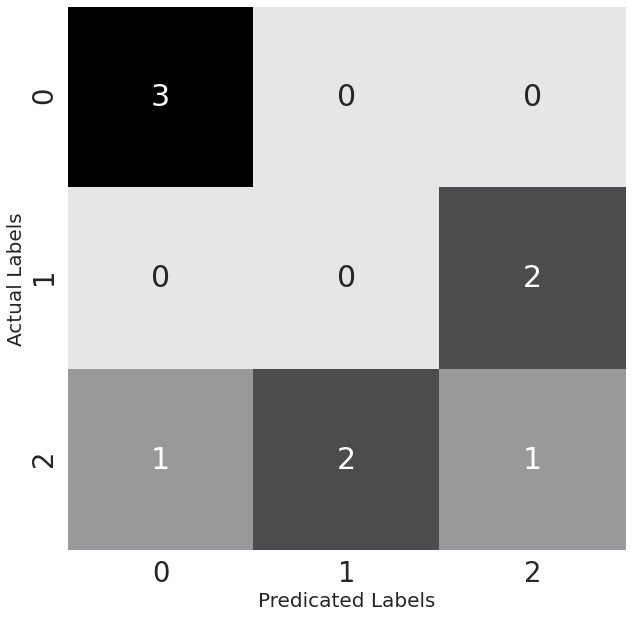

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# some targets
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]

# some predictions
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

# get confusion matrix from sklearn
cm = metrics.confusion_matrix(y_true, y_pred)

# plot using matplotlib and seaborn
plt.figure(figsize = (10, 10))
cmap = sns.cubehelix_palette(50, hue = 0.05, rot = 0, light = 0.9, dark = 0, as_cmap = True)
sns.set(font_scale = 2.5)
sns.heatmap(cm, annot = True, cmap = cmap, cbar = False)
plt.ylabel('Actual Labels', fontsize = 20)
plt.xlabel('Predicated Labels', fontsize = 20)

## Presion at k or P@K
Matrix from multi-label classification


In [2]:
def pk(y_true, y_pred, k):
  """
  This function calculates precision at k for a single sample
  :param y_true: list of values, actual classes
  :param y_pred: list of values, predicted classes
  :return: precision at a given value k
  """
  # if k is 0, return 0. We should never have this 
  # as k is always >= 1

  if k == 0:
    return 0
  
  # we are interested only in top-k predications
  y_pred = y_pred[:k]

  # convert predictions to set
  pred_set = set(y_pred)

  # convert actual values to set
  true_set = set(y_true)

  # find common values
  common_values = pred_set.intersection(true_set)

  return len(common_values) / len(y_pred[:k])

## Average precision at K or AP@K

In [3]:
def apk(y_true, y_pred, k):
  """
  This function calculates average precision at k for a single sample
  :param y_true: list of the values, actual classes'
  :param y_pred: list of the values, predicted classes
  :return: average precision at a given value k
  """

  # initialize p@k list of values
  pk_values = []

  # loop over all k. from 1 to k + 1
  for i in range(1, k + 1):
    # calculate p@i and append to list
    pk_values.append(pk(y_true, y_pred, i))

  # if we have no values in the list, return 0
  if len(pk_values) == 0:
    return 0
  
  # else return the sum of the list over length of list
  return sum(pk_values) / len(pk_values)

In [4]:
y_true = [[1, 2, 3], [0, 2], [1], [2, 3], [1, 0], []]
y_pred = [[0, 1, 2], [1], [0, 2, 3], [2, 3, 4, 0], [0, 1, 2], [0]]

for i in range(len(y_true)):
  for j in range(1, 4):
    print(
        f"""
        y_true={y_true[i]}, 
        y_pred={y_pred[i]},
        AP@{j}={apk(y_true[i], y_pred[i], k=j)}
        """
        )


        y_true=[1, 2, 3], 
        y_pred=[0, 1, 2],
        AP@1=0.0
        

        y_true=[1, 2, 3], 
        y_pred=[0, 1, 2],
        AP@2=0.25
        

        y_true=[1, 2, 3], 
        y_pred=[0, 1, 2],
        AP@3=0.38888888888888884
        

        y_true=[0, 2], 
        y_pred=[1],
        AP@1=0.0
        

        y_true=[0, 2], 
        y_pred=[1],
        AP@2=0.0
        

        y_true=[0, 2], 
        y_pred=[1],
        AP@3=0.0
        

        y_true=[1], 
        y_pred=[0, 2, 3],
        AP@1=0.0
        

        y_true=[1], 
        y_pred=[0, 2, 3],
        AP@2=0.0
        

        y_true=[1], 
        y_pred=[0, 2, 3],
        AP@3=0.0
        

        y_true=[2, 3], 
        y_pred=[2, 3, 4, 0],
        AP@1=1.0
        

        y_true=[2, 3], 
        y_pred=[2, 3, 4, 0],
        AP@2=1.0
        

        y_true=[2, 3], 
        y_pred=[2, 3, 4, 0],
        AP@3=0.8888888888888888
        

        y_true=[1, 0], 
        y_pred=[0, 1, 2],
  

## Mean average precision at k or MAP@K

In [5]:
def mapk(y_true, y_pred, k):
  """
  This function calculates mean average precision at k for a single sample
  :param y_true: list of the values, actual classes
  :param y_pred: list of the values, predicted classes
  :return: mean average precision at a given value k
  """

  # initialize empty list for apk values
  apk_values = []

  # loop over all samples
  for i in range(len(y_true)):
    apk_values.append(apk(y_true[i], y_pred[i], k=k))
  
  # return mean of apk values list
  return sum(apk_values) / len(apk_values)

In [6]:
y_true = [[1, 2, 3], [0, 2], [1], [2, 3], [1, 0], []]
y_pred = [[0, 1, 2], [1], [0, 2, 3], [2, 3, 4, 0], [0, 1, 2], [0]]

print(mapk(y_true=y_true, y_pred=y_pred, k=1))
print(mapk(y_true=y_true, y_pred=y_pred, k=2))
print(mapk(y_true=y_true, y_pred=y_pred, k=3))
print(mapk(y_true=y_true, y_pred=y_pred, k=4))

0.3333333333333333
0.375
0.3611111111111111
0.34722222222222215


P@K, AP@K, and MAP@K all range from 0 to 1 with being the best

## Mean absolute error (MAE)


In [7]:
import numpy as np

def mean_absolute_error(y_true, y_pred):
  """
  This function calculates mae
  :param y_true: list of real numbers, true values
  :param y_pred: list of real numbers, predicted values
  """

  # initialize error at 0
  error = 0
  
  # loop over all samples in the true and predicted list
  for yt, yp in zip(y_true, y_pred):
    # calculate absolute error and add to error
    error += np.abs(yt-yp)
  
  # return mean error
  return error / len(y_true)


In [8]:
y_true = [1, 2, 3, 1, 2, 3, 1, 2, 3]
y_pred = [2, 1, 3, 1, 2, 3, 3, 1, 2]

mean_absolute_error(y_true, y_pred)

0.6666666666666666

## Mean squared error (MSE)


In [9]:
def mean_squared_error(y_true, y_pred):
  """
  This function calculates mse
  :param y_true: list of real values, true values
  :param y_pred: list of 
  """
  # initialize error at 0
  error = 0

  # loop over all samples in the true and predicated list
  for yt, yp in zip(y_true, y_pred):
    # calculate squared error and add to error
    error += (yt - yp) ** 2

  # return mean error
  return error / len(y_true)

In [10]:
y_true = [1, 2, 3, 1, 2, 3, 1, 2, 3]
y_pred = [2, 1, 3, 1, 2, 3, 3, 1, 2]

mean_squared_error(y_true, y_pred)

0.8888888888888888

## Mean squared logarithmic error (MSLE)


In [11]:
import numpy as np

def mean_squared_log_error(y_true, y_pred):
  """
  This functio calculates msle
  :param y_true: list of real numbers, true values
  :param y_pred: list of real numbers, predicted values
  :return: mean squared logarithmic error
  """

  # initialize error at 0
  error = 0

  # loop over all samples in true and predicted list
  for yt, yp in zip(y_true, y_pred):
    # calculate squared log error and add to error
    error += (np.log(1 + yt) - np.log(1 + yp)) ** 2

  # return mean error
  return error / len(y_true)

In [12]:
y_true = [1, 2, 3, 1, 2, 3, 1, 2, 3]
y_pred = [2, 1, 3, 1, 2, 3, 3, 1, 2]

mean_squared_log_error(y_true, y_pred)

0.11737998337864997

## Mean percentage error (MPE)

In [13]:
def mean_percentage_error(y_true, y_pred):
  """
  This function calculates mpe
  :param y_true: list of real numbers, true values
  :param y_pred: list of real numbers, predicted values
  :return: mean percentage error
  """

  # intialize error at 0
  error = 0
  
  # loop over all samples in true and predicted list
  for yt, yp in zip(y_true, y_pred):
    # calculate percentage error and add to error
    error += (yt - yp) / yt
  
  # return mean percentage error
  return error / len(y_true)

In [14]:
y_true = [1, 2, 3, 1, 2, 3, 1, 2, 3]
y_pred = [2, 1, 3, 1, 2, 3, 3, 1, 2]

mean_percentage_error(y_true, y_pred)

-0.1851851851851852

## Mean absolute percentage error (MAPE)

In [15]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
  """
  This function calculates mape
  :param y_true: list of real numbers, true values
  :param y_pred: list of real numbers, predicted values
  :return: mean absolute percentage error
  """

  # initialize error at 0
  error = 0

  # loop over all samples in true and predicted list
  for yt, yp in zip(y_true, y_pred):
    # calculate percentage error and add to error
    error += np.abs(yt - yp) / yt

  # return mean percentage error
  return error / len(y_true)

In [16]:
y_true = [1, 2, 3, 1, 2, 3, 1, 2, 3]
y_pred = [2, 1, 3, 1, 2, 3, 3, 1, 2]

mean_absolute_percentage_error(y_true, y_pred)

0.48148148148148145

## R-squared (R^2)
In simple words, R-squared says how good your model fits the data. R-squared
closer to 1.0 says that the model fits the data quite well,

In [17]:
import numpy as np

def r2(y_true, y_pred):
  """
  This function calculates r-squared error
  :param y_true: list of real numbers, true values
  :param y_pred: list of real numbsrs, predicted values
  :return: r2 error
  """

  # calculate the mean value of true values
  mean_true_value = np.mean(y_true)

  # initialize numerator and denominator with 0
  numerator, denominator = 0, 0

  # loop over all true and predicted values
  for yt, yp in zip(y_true, y_pred):
    # update numerator
    numerator += (yt - yp) ** 2
    # update denominator
    denominator += (yt - mean_true_value) ** 2
  
  # calculate the ratio
  ratio  = numerator / denominator

  # return 1 - ratio
  return 1 - ratio

In [18]:
y_true = [1, 2, 3, 1, 2, 3, 1, 2, 3]
y_pred = [2, 1, 3, 1, 2, 3, 3, 1, 2]
r2(y_true, y_pred)

-0.33333333333333326

## Quadratic weighted kappa (QWK)

One of them which is quite widely used is **quadratic weighted kappa**, also known
as QWK. It is also known as **Cohen’s kappa**. QWK measures the “agreement”
between two “ratings”. The ratings can be any real numbers in 0 to N. And
predictions are also in the same range. An agreement can be defined as how close
these ratings are to each other. So, it’s suitable for a classification problem with N
different categories/classes. If the agreement is high, the score is closer towards 1.0.
In the case of low agreement, the score is close to 0.

In [19]:
from sklearn import metrics

y_true = [1, 2, 3, 1, 2, 3, 1, 2, 3]
y_pred = [2, 1, 3, 1, 2, 3, 3, 1, 2]

qwk = metrics.cohen_kappa_score(y_true, y_pred, weights="quadratic")
acc = metrics.accuracy_score(y_true, y_pred)
print(qwk, acc)

0.33333333333333337 0.4444444444444444


## Matthew’s Correlation Coefficient (MCC)
Matthew’s Correlation Coefficient (MCC). MCC ranges
from -1 to 1. 1 is perfect prediction, -1 is imperfect prediction, and 0 is random prediction.

In [20]:
def true_positive(y_true, y_pred):
  """
  Function to calculate True Positives
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: number of true positives
  """
  # initialize
  tp = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 1 and yp == 1:
      tp += 1    
  return tp

def true_negative(y_true, y_pred):
  """
  Function to calculate True Negatives
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: number of true negatives
  """
  # initialize
  tn = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 0 and yp == 0:
      tn += 1
  return tn


def false_positive(y_true, y_pred):
  """
  Function to calculate False Positives
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: number of false positives
  """
  # initialize
  fp = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 0 and yp == 1:
      fp += 1
  return fp

def false_negative(y_true, y_pred):
  """
  Function to calculate False Negatives
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: number of false negatives
  """
  # initialize
  fn = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 1 and yp == 0:
      fn += 1
  return fn

In [21]:
def mcc(y_true, y_pred):
  """
  This function calculates MCC for binary classification
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: mcc score
  """

  tp = true_positive(y_true, y_pred)
  tn = true_negative(y_true, y_pred)
  fp = false_positive(y_true, y_pred)
  fn = false_negative(y_true, y_pred)
  
  numerator = (tp * tn) - (fp * fn)
  denominator = ((tp + fp) * (fn + tn) * (fp + tn) * (tp + fn))
  
  denominator = denominator ** 0.5
  return numerator / denominator

In [22]:
y_true = [1, 0, 1, 0, 1, 0, 1, 1, 1]
y_pred = [1, 1, 1, 1, 0, 0, 0, 1, 1]

print(mcc(y_true, y_pred))

0.0
